In [0]:
df=spark.read.csv('/FileStore/tables/Mall_Customers-2.csv',header=True)

In [0]:
df=df.toPandas()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [0]:
X=df.iloc[:,3:5].values
X

Out[38]: array([['15', '39'],
       ['15', '81'],
       ['16', '6'],
       ['16', '77'],
       ['17', '40'],
       ['17', '76'],
       ['18', '6'],
       ['18', '94'],
       ['19', '3'],
       ['19', '72'],
       ['19', '14'],
       ['19', '99'],
       ['20', '15'],
       ['20', '77'],
       ['20', '13'],
       ['20', '79'],
       ['21', '35'],
       ['21', '66'],
       ['23', '29'],
       ['23', '98'],
       ['24', '35'],
       ['24', '73'],
       ['25', '5'],
       ['25', '73'],
       ['28', '14'],
       ['28', '82'],
       ['28', '32'],
       ['28', '61'],
       ['29', '31'],
       ['29', '87'],
       ['30', '4'],
       ['30', '73'],
       ['33', '4'],
       ['33', '92'],
       ['33', '14'],
       ['33', '81'],
       ['34', '17'],
       ['34', '73'],
       ['37', '26'],
       ['37', '75'],
       ['38', '35'],
       ['38', '92'],
       ['39', '36'],
       ['39', '61'],
       ['39', '28'],
       ['39', '65'],
       ['40', '55'],
       ['4

In [0]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X=sc.fit_transform(X)

In [0]:
#X

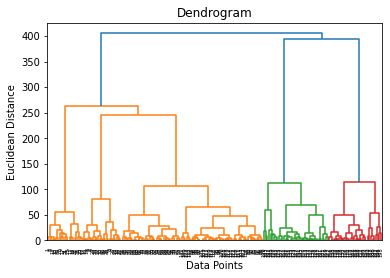

In [0]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

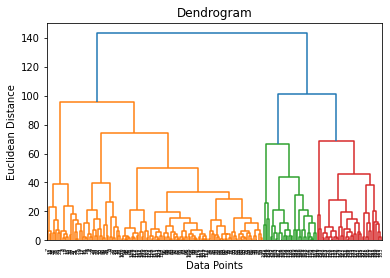

In [0]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='complete'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

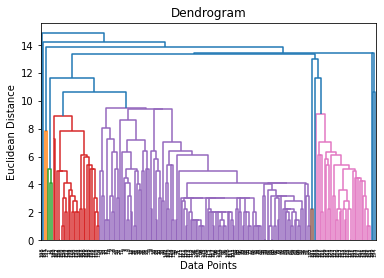

In [0]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='single'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5)
y_pred=model.fit_predict(X)

In [0]:
y_pred

Out[41]: array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Out[44]: <matplotlib.collections.PathCollection at 0x7f93df5114c0>

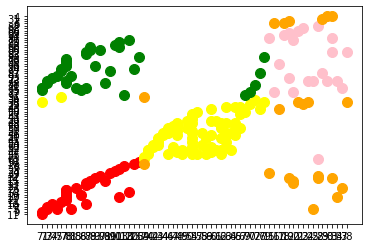

In [0]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='pink',label='cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='orange',label='cluster5')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,c='blue',label='Center')
plt.title('Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

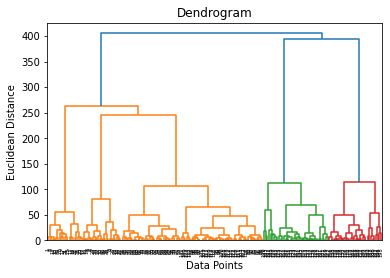

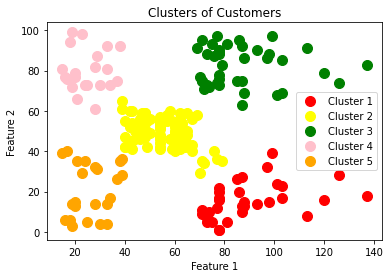

In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create Spark session
spark = SparkSession.builder.appName("MallCustomersClustering").getOrCreate()

# Load CSV with schema inference
df = spark.read.csv('/FileStore/tables/Mall_Customers-2.csv', header=True, inferSchema=True)

# Convert to Pandas DataFrame
df = df.toPandas()

# Verify and preprocess data
X = df.iloc[:, 3:5].values  # Assuming '3:5' are numeric
X = pd.DataFrame(X).dropna().values  # Handle missing values if any

# Plot the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=5)
y_pred = model.fit_predict(X)

# Visualize clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=100, c='pink', label='Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=100, c='orange', label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
